In [18]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from torch.autograd import Variable
%matplotlib inline

In [10]:
Time_STEP = 10
LR = 0.02

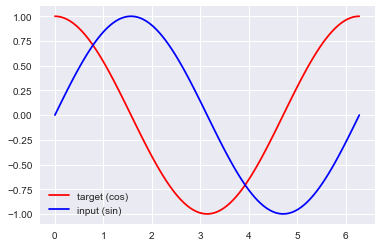

In [11]:
steps = np.linspace(0, np.pi*2, 100)
x_show = np.sin(steps)
y_show = np.cos(steps)
plt.plot(steps, y_show, 'r-', label='target (cos)')
plt.plot(steps, x_show, 'b-', label='input (sin)')
plt.legend(loc='best')

In [38]:
from RNN import RNN
rnn = RNN()
print(rnn)

RNN (
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear (32 -> 1)
)


In [39]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.MSELoss()

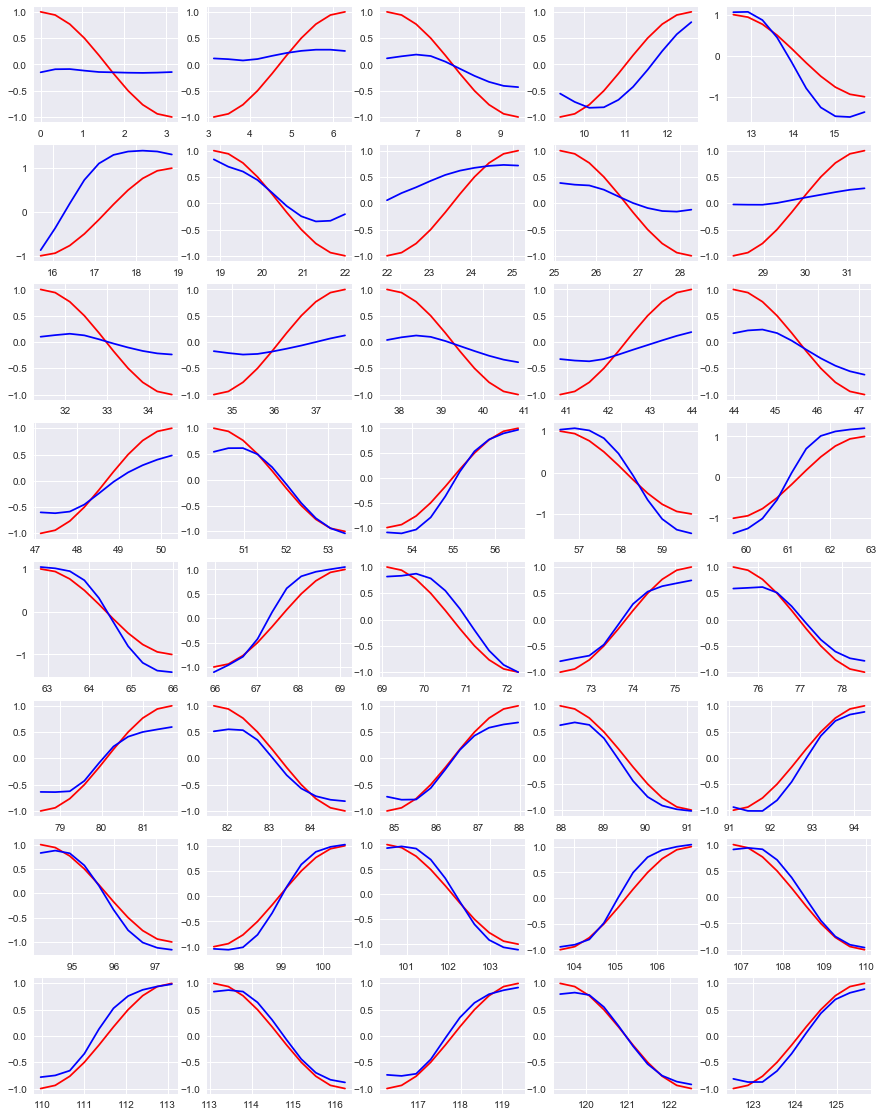

In [40]:
plt.figure(figsize=(15,20))
h_state = None
for step in xrange(40):
    start, end = step*np.pi, (step+1)*np.pi
    steps = np.linspace(start, end, Time_STEP, dtype=np.float32)
    # steps = np.linspace(start, end, Time_STEP, dtype=np.float64)  FAULT!!!!
    x_train = Variable(torch.from_numpy(np.sin(steps).reshape(1,-1,1)))
    y_train = Variable(torch.from_numpy(np.cos(steps).reshape(1,-1,1)))
    
    prediction, h_state = rnn(x_train, h_state)

    # improtant!!!
    h_state = Variable(h_state.data)   # repack the hidden state, 
                                       # break the connection from last iteration
    loss = loss_func(prediction, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #plot
    plt.subplot(8,5,step+1)
    plt.plot(steps, y_train.data.numpy().reshape(-1), 'r-')
    plt.plot(steps, prediction.data.numpy().reshape(-1), 'b-')